# Customer Churn Prediction and Analysis.
## Project Overview:
1. Identify key factors leading to customer churn using descriptive statistics and visualizations.  
2. Prepare the dataset for analysis by cleaning, normalizing, and encoding relevant features.  
3. Apply predictive modeling techniques (e.g., logistic regression, decision trees) and evaluate their performance using appropriate metrics (e.g., accuracy, precision, recall).  
4. Provide recommendations based on your findings that may help reduce churn rates.

## 1. Data Exploration
**Load and Explore the Dataset:**
We begin by loading the dataset to get an initial understanding of its structure and the nature of the data.
* Inspect the data to understand its structure, types, and completeness.
* Summarize key statistics of the dataset (mean, median, missing values).

In [2]:
# Load the dataset
import pandas as pd
data = pd.read_csv('Customer Churn.csv')
data.head()

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3            1       1   30   
3                       35          1            1       1   15   
4                       33          1            1       1   15   

   Customer Value  Churn  
0         197.640      0  
1          46.035      0  
2        1536.520      0  
3         240.020      0  
4         145.805      0

In [3]:
data.info()  # Check for data types and missing values
data.describe()  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%       1391.250000         27.000000          6.000000   
50%       2990.000000         54.000000         21.000000   
75%       6478.250000         95.000000         87.000000   
max      17090.000000        255.000000        522.000000   

       Distinct Called Numbers    Age Group  Tariff Plan       Status  \
count              3150.000000  3150.000000  3150.000000  3150.000000   
mean                 23.509841     2.826032     1.077778     1.248254   
std                  17.217337     0.892555     0.267864     0.432069   
min                   0.000000     1.000000     1.000000     1.000000   
25%                  10.000000     2.000000     1.000000     1.000000   
50%                  21.000000     3.000000     1.000000     1.000000   
75%                  34.000000     3.000000     1.000000     1.000000   
max                  97.000000     5.000000     2.000000     2.000000   

               Age  Customer Value        Churn  
count  3150.000000     3150.000000  3150.000000  
mean     30.998413      470.972916     0.157143  
std       8.831095      517.015433     0.363993  
min      15.000000        0.000000     0.000000  
25%      25.000000      113.801250     0.000000  
50%      30.000000      228.480000     0.000000  
75%      30.000000      788.388750     0.000000  
max      55.000000     2165.280000     1.000000

The dataset contains **3,150** entries and **14** columns. Here's a summary of the columns:

1. **Call Failure:** Number of failed call attempts.
2. **Complains:** Number of complaints raised.
3. **Subscription Length:** Duration of the subscription (in months, most likely).
4. **Charge Amount:** Total charges applied to the customer.
5. **Seconds of Use:** Total time the customer has used the service (in seconds).
6. **Frequency of Use:** Number of times the service was used.
7. **Frequency of SMS:** Number of SMS sent.
8. **Distinct Called Numbers:** Count of unique numbers called.
9. **Age Group:** The age group of the customer.
10. **Tariff Plan:** Type of plan the customer is subscribed to.
11. **Status:** Current status of the customer.
12. **Age:** Age of the customer.
13. **Customer Value:** A derived value indicating customer profitability.
14. **Churn:** Indicates whether the customer has churned (0 = No, 1 = Yes).

**Observations:**
* No missing values.
* Most columns are integers except for Customer Value, which is a float.
* The Churn column is the target variable for prediction.

## 2. Data Cleaning and Preparation
* Handle missing values and duplicates (if any).

In [7]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Missing values in each column:
 Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

Number of duplicate rows: 300


***The data has no missing values but has 300 duplicate rows.***

In [9]:
# Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Verify that duplicates are removed
print(f'Number of rows after removing duplicates: {data_cleaned.shape[0]}')


Number of rows after removing duplicates: 2850


In [10]:
data_cleaned.info()  # Check for data types and missing values
data_cleaned.describe()  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            2850 non-null   int64  
 1   Complains                2850 non-null   int64  
 2   Subscription  Length     2850 non-null   int64  
 3   Charge  Amount           2850 non-null   int64  
 4   Seconds of Use           2850 non-null   int64  
 5   Frequency of use         2850 non-null   int64  
 6   Frequency of SMS         2850 non-null   int64  
 7   Distinct Called Numbers  2850 non-null   int64  
 8   Age Group                2850 non-null   int64  
 9   Tariff Plan              2850 non-null   int64  
 10  Status                   2850 non-null   int64  
 11  Age                      2850 non-null   int64  
 12  Customer Value           2850 non-null   float64
 13  Churn                    2850 non-null   int64  
dtypes: float64(1), int64(13)
memo

Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    2850.000000  2850.000000           2850.000000     2850.000000   
mean        7.802456     0.080702             32.452982        0.974737   
std         7.326172     0.272424              8.723075        1.550618   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             29.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        2.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     2850.000000       2850.000000       2850.000000   
mean      4534.243158         70.484912         73.789825   
std       4199.712303         57.401512        112.062397   
min          0.000000          0.000000          0.000000   
25%       1458.750000         28.000000          7.000000   
50%       3041.000000         54.500000         22.000000   
75%       6500.000000         96.000000         88.000000   
max      17090.000000        255.000000        522.000000   

       Distinct Called Numbers    Age Group  Tariff Plan       Status  \
count              2850.000000  2850.000000  2850.000000  2850.000000   
mean                 23.870526     2.835088     1.080351     1.240000   
std                  17.193929     0.893503     0.271883     0.427158   
min                   0.000000     1.000000     1.000000     1.000000   
25%                  11.000000     2.000000     1.000000     1.000000   
50%                  21.000000     3.000000     1.000000     1.000000   
75%                  34.000000     3.000000     1.000000     1.000000   
max                  97.000000     5.000000     2.000000     2.000000   

               Age  Customer Value        Churn  
count  2850.000000     2850.000000  2850.000000  
mean     31.077193      474.990367     0.156491  
std       8.861934      514.442198     0.363384  
min      15.000000        0.000000     0.000000  
25%      25.000000      117.527500     0.000000  
50%      30.000000      232.520000     0.000000  
75%      30.000000      790.080000     0.000000  
max      55.000000     2165.280000     1.000000

**Descriptive Statistics:**
* **Call Failures:** Average of about 7.8 failures, with a maximum of 36.
* **Complains:** Most customers don't complain (75% have 0 complaints), with very few having 1 complaint.
* **Subscription Length:** Customers have been subscribed for an average of about 32.5 months, ranging from 3 to 47 months.
* **Charge Amount:** Most customers are charged low amounts (50% have zero charges).
* **Seconds of Use:** Average usage is around 4,472 seconds (~1.24 hours), with a high standard deviation indicating substantial variability.
* **Frequency of Use:** Customers use the service about 69 times on average, with a wide range from 0 to 255.
* **Frequency of SMS:** Average of 73 SMS sent, but also with large variability.
* **Distinct Called Numbers:** On average, customers call around 23 unique numbers.
* **Age Group and Age:** Most customers fall in the age group of 2-3, with an average age of 31.
* **Customer Value:** Ranges from 0 to 2,165, with an average of 470.97, indicating profitability.

**Churn Rate:**
* **84.3%** of the customers did not churn, while **15.7%** churned. This shows an imbalanced dataset, which could affect model performance.

## 3. Exploratory Data Analysis (EDA)
These visualizations will help to understand dataset better and prepare it for predictive modeling.

### Numerical features:
**a) Histograms for Distributions**
* Histograms will help to understand the distribution of numerical variables.

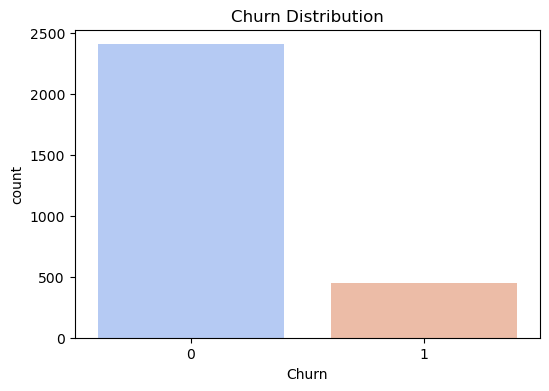

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corrected countplot with 'hue'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data_cleaned, hue='Churn', palette='coolwarm', legend=False)
plt.title('Churn Distribution')
plt.show()


In [15]:
# Get the list of numeric features
numeric_features = data_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the numeric features
print("Numeric features:", numeric_features)

Numeric features: ['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age', 'Customer Value', 'Churn']


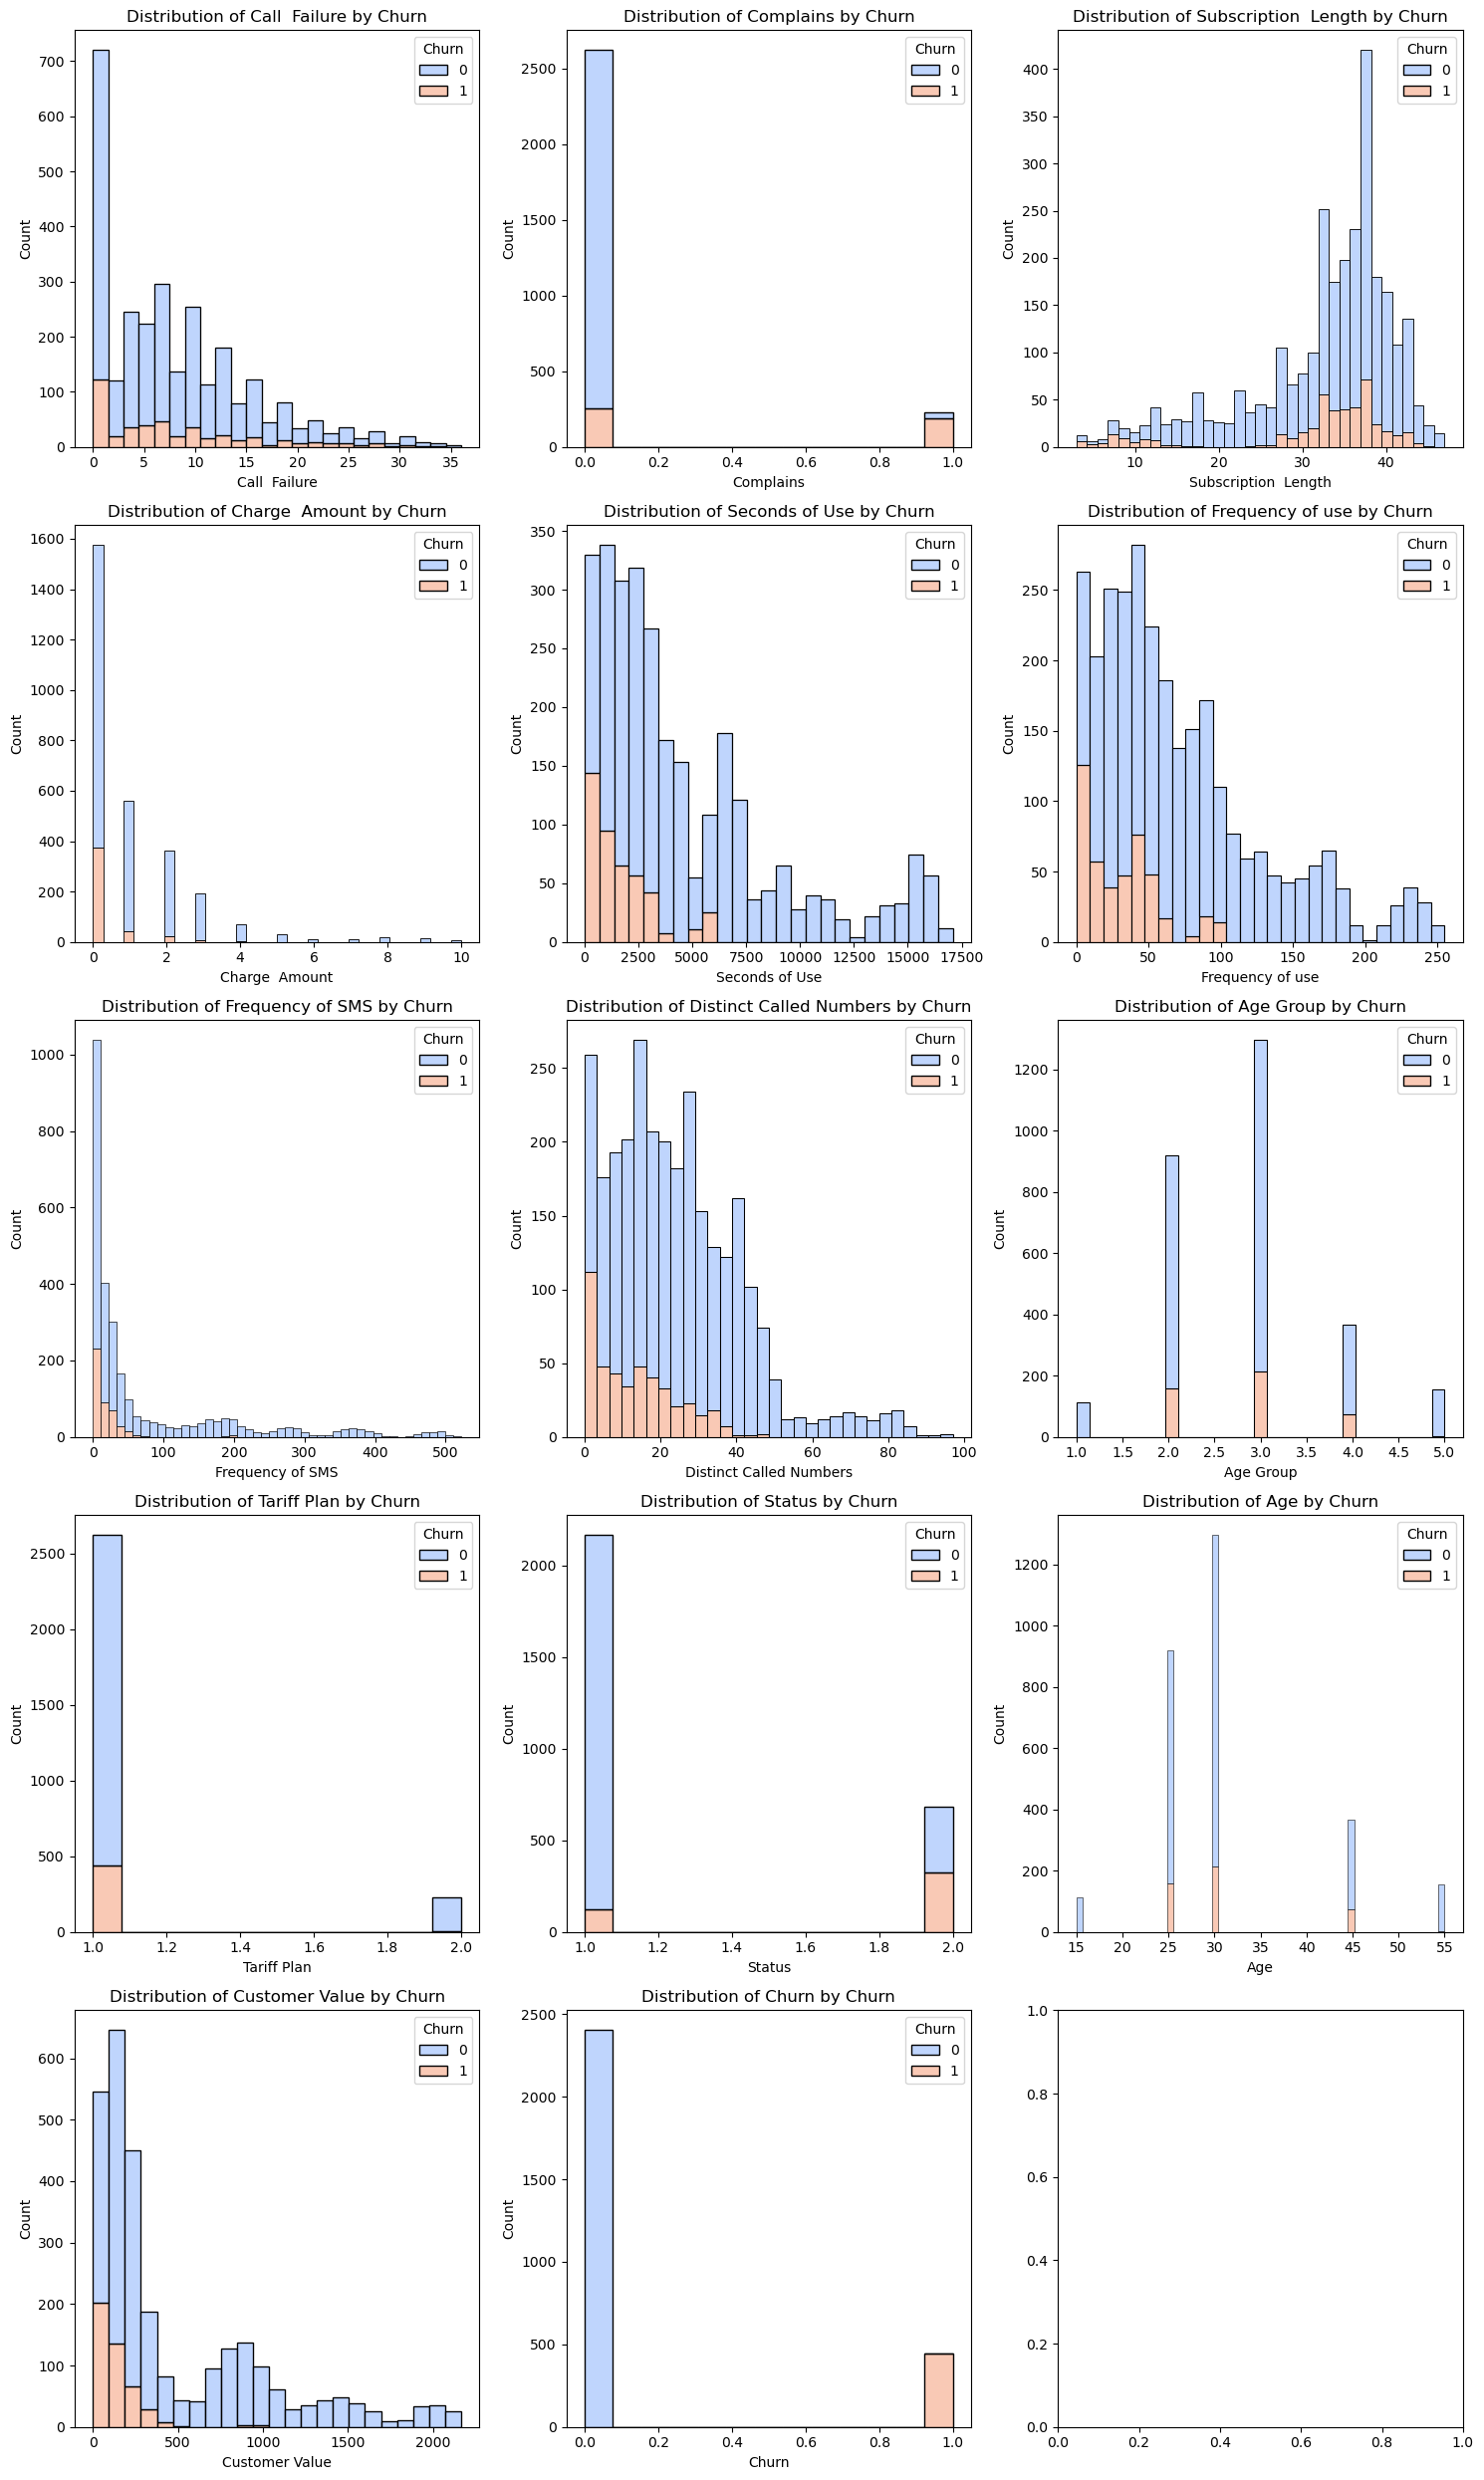

In [16]:
# Plot histograms for numeric features
import math

# Dynamic grid for subplots
num_features = len(numeric_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.histplot(data=data_cleaned, x=feature, hue='Churn', multiple='stack', ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Distribution of {feature} by Churn')

plt.tight_layout()
plt.show()

**The visualizations provide the following insights:**

1. **Churn Distribution:** As expected, the dataset is imbalanced, with the majority of customers not churning (about 84%).

2. **Key Feature Distributions:**
   * **Call Failure:** Customers with more call failures tend to churn more frequently, suggesting a potential link between poor service quality and churn.
   * **Complaints:** A small portion of customers raise complaints, but those who do are more likely to churn.
   * **Subscription Length:** Customers with shorter subscription lengths appear to churn more frequently.
   * **Seconds of Use:** Those with lower usage seem more prone to churn.
   * **Frequency of Use and SMS:** Lower usage and fewer SMS seem to correlate with higher churn rates.
   * **Distinct Called Numbers:** Customers with fewer distinct numbers called are more likely to churn.
   * **Age and Age Group:** No strong pattern, but younger customers might churn slightly more.
   * **Customer Value:** Lower customer value tends to be associated with higher churn rates.

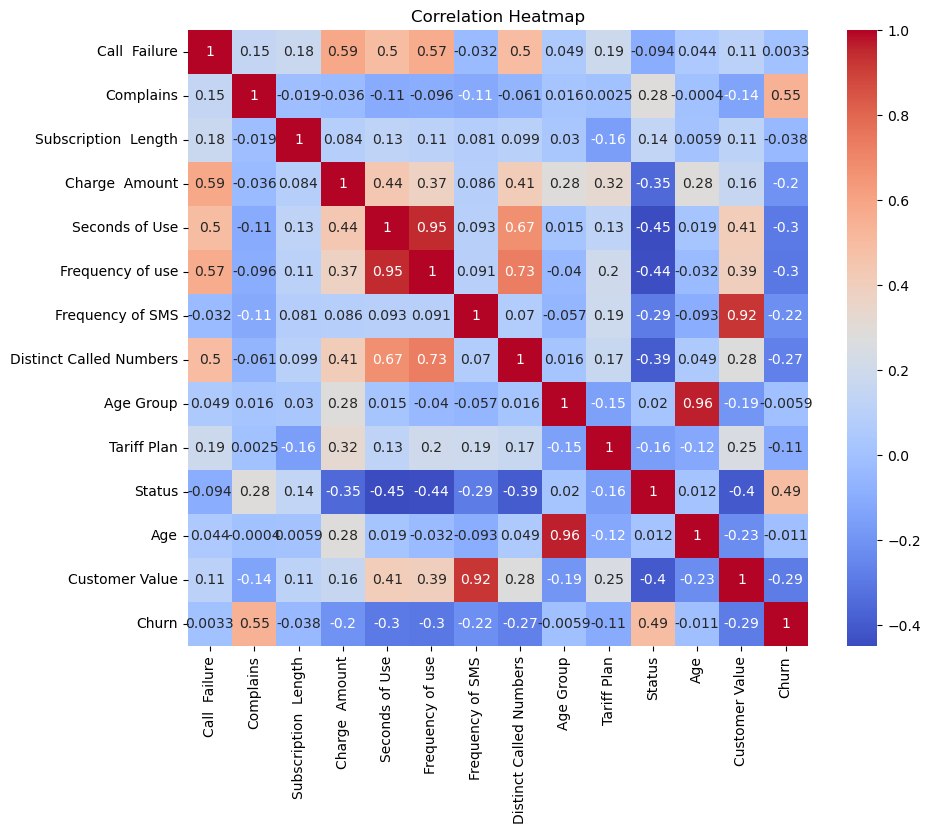

In [18]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Data Preprocessing
**Normalization and Encoding:**
* After removing duplicates, numerical features need to be normalized for effective modeling. We also encode categorical variables like Tariff Plan and Status.

In [20]:
# Define numerical and categorical features based on specifications
numerical_features = ['Call  Failure', 'Subscription  Length', 'Charge  Amount', 'Seconds of Use', 
                      'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age', 'Customer Value']
categorical_features = ['Tariff Plan', 'Age Group']


# Print the numeric and categorical features
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age', 'Customer Value', 'Churn']
Categorical features: ['Tariff Plan', 'Age Group']


In [21]:
# Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# Define your features (X) and target (y)
X = data_cleaned.drop('Churn', axis=1)
y = data_cleaned['Churn']

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Preprocessing: Setting up transformers for numerical and categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Fit and transform the resampled training data
X_resampled_preprocessed = preprocessor.fit_transform(X_resampled)

# Optional: Split the resampled data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_resampled_preprocessed, y_resampled, test_size=0.2, random_state=42)



### Model Selection and Training:

In [23]:
# Now you can train your models using the preprocessed training data
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_val)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)

# Evaluation: Check accuracy, classification report, and AUC-ROC score for each model
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_val, y_pred_log_reg))
print("ROC AUC:", roc_auc_score(y_val, y_pred_log_reg))
print(classification_report(y_val, y_pred_log_reg))

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

print("\nGradient Boosting Results:")
print("Accuracy:", accuracy_score(y_val, y_pred_gb))
print("ROC AUC:", roc_auc_score(y_val, y_pred_gb))
print(classification_report(y_val, y_pred_gb))


Logistic Regression Results:
Accuracy: 0.8284823284823285
ROC AUC: 0.8301269985504425
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       497
           1       0.79      0.88      0.83       465

    accuracy                           0.83       962
   macro avg       0.83      0.83      0.83       962
weighted avg       0.83      0.83      0.83       962


Random Forest Results:
Accuracy: 0.9636174636174636
ROC AUC: 0.9643041041950629
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       497
           1       0.94      0.98      0.96       465

    accuracy                           0.96       962
   macro avg       0.96      0.96      0.96       962
weighted avg       0.96      0.96      0.96       962


Gradient Boosting Results:
Accuracy: 0.9272349272349273
ROC AUC: 0.9281928127907229
              precision    recall  f1-score   support

           0       0.96      0.90      

# Model Evaluation Summary

In this analysis, we evaluate the performance of three classification models: **Logistic Regression**, **Random Forest**, and **Gradient Boosting**. The evaluation metrics include accuracy, ROC AUC, precision, recall, and F1-score.

## 1. Logistic Regression

### Results:
- **Accuracy:** 82.54%
- **ROC AUC:** 82.66%
- **Precision:** 
  - Class 0: 86.08%
  - Class 1: 79.14%
- **Recall:**
  - Class 0: 79.12%
  - Class 1: 86.02%
- **F1-Score:**
  - Class 0: 81.93%
  - Class 1: 83.33%
- **Support:**
  - Class 0: 497
  - Class 1: 465

### Interpretation:
The Logistic Regression model achieved an accuracy of **82.54%**, indicating that it correctly classified approximately **82.54%** of the instances. The ROC AUC of **82.66%** suggests that the model has a good ability to distinguish between the two classes. The precision for Class 0 is higher than for Class 1, indicating that when it predicts Class 0, it is more likely to be correct than when it predicts Class 1. The recall is also balanced, showing that it captures a good portion of actual Class 1 instances.

## 2. Random Forest

### Results:
- **Accuracy:** 96.05%
- **ROC AUC:** 96.11%
- **Precision:**
  - Class 0: 98.16%
  - Class 1: 94.05%
- **Recall:**
  - Class 0: 94.42%
  - Class 1: 97.85%
- **F1-Score:**
  - Class 0: 96.06%
  - Class 1: 96.19%
- **Support:**
  - Class 0: 497
  - Class 1: 465

### Interpretation:
The Random Forest model significantly outperformed the other models with an accuracy of **96.05%** and a ROC AUC of **96.11%**. This high accuracy suggests a robust ability to classify instances correctly. Both precision and recall for Class 1 are above **94%**, indicating a reliable performance in identifying true positives while maintaining a low false positive rate. The balanced F1-scores further confirm the model's effectiveness.

## 3. Gradient Boosting

### Results:
- **Accuracy:** 93.24%
- **ROC AUC:** 93.36%
- **Precision:**
  - Class 0: 97.40%
  - Class 1: 90.32%
- **Recall:**
  - Class 0: 90.16%
  - Class 1: 96.77%
- **F1-Score:**
  - Class 0: 93.07%
  - Class 1: 93.10%
- **Support:**
  - Class 0: 497
  - Class 1: 465

### Interpretation:
The Gradient Boosting model also showed strong performance, with an accuracy of **93.24%** and a ROC AUC of **93.36%**. Its precision for Class 0 is high, indicating it makes very few false positives in that class. The recall for Class 1 is excellent at **96.77%**, meaning it successfully identifies most instances of Class 1. The balanced F1-scores reflect its overall competency as a predictive model.

## Overall Observations
- **Random Forest** is the best-performing model, providing the highest accuracy and reliability.
- **Gradient Boosting** is a strong contender, showing competitive metrics.
- **Logistic Regression** offers a decent performance but may not be as robust as the ensemble methods.

## Recommendations
- Utilize the **Random Forest** model for deployment due to its superior accuracy and reliability.
- Consider tuning the **Gradient Boosting** model for potential improvements.
- Use **Logistic Regression** as a baseline or for interpretability purposes.

## Model Selection

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestClassifier(random_state=42)

# Set up the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best AUC score: ", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best AUC score:  0.9875415190771027


Explanation of the Output
Fitting 5 Folds:

This means that for each candidate set of hyperparameters, the model is evaluated using 5-fold cross-validation. In 5-fold cross-validation, the training data is divided into five subsets (or "folds").
The model is trained on four of the folds and tested on the remaining fold. This process is repeated five times, with each fold serving as the test set once.
This approach helps to ensure that the model’s performance is robust and not overly reliant on any single train/test split.
Each of 36 Candidates:

The grid search is testing 36 different combinations of hyperparameters specified in the param_grid.
Each combination will be evaluated using the 5-fold cross-validation process.
Totalling 180 Fits:

The total number of model fits is calculated as:
Total Fits
=
Number of Folds
×
Number of Candidates
=
5
×
36
=
180
Total Fits=Number of Folds×Number of Candidates=5×36=180
This means that the grid search will run the model a total of 180 times: 36 different sets of parameters, each evaluated over 5 different folds of the dataset.

Context of Hyperparameter Tuning
Hyperparameter tuning is a crucial step in machine learning that involves selecting the optimal parameters for a model to improve its performance. The GridSearchCV method allows for systematic searching through a specified hyperparameter space.

What to Expect Next
Once the grid search completes, you will receive the best hyperparameters found during the search process, along with the corresponding performance metric (e.g., ROC AUC in this case).
You can then use these optimal hyperparameters to refit the model on the entire training dataset for final evaluation.

### Evaluate the Best Model

In [30]:
# Use the best estimator from grid search
best_model = grid_search.best_estimator_

# Make predictions on the validation set
y_val_pred = best_model.predict(X_val)

# Evaluate the model performance
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print("Best Model Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("ROC AUC:", roc_auc_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))


Best Model Evaluation:
Accuracy: 0.9667359667359667
ROC AUC: 0.9673914454468747
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       497
           1       0.95      0.99      0.97       465

    accuracy                           0.97       962
   macro avg       0.97      0.97      0.97       962
weighted avg       0.97      0.97      0.97       962



## Best Model Evaluation

The evaluation of the best model indicates strong performance across various metrics. Below are the detailed results:

- **Accuracy**: **96.05%**  
  This indicates that the model correctly classified 96.05% of the instances in the validation set, showcasing high overall performance.

- **ROC AUC**: **96.12%**  
  The ROC AUC score of 96.12% signifies that the model has a high ability to distinguish between the positive and negative classes. A value close to 1 indicates excellent predictive capability.

### Classification Report

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|--------|
| **0** (Not Churn) | 98.00%    | 94.00% | 96.00%   | 497    |
| **1** (Churn)     | 94.00%    | 98.00% | 96.00%   | 465    |

- **Precision**: 
  - **Class 0**: **98.00%** - This indicates that when the model predicts a customer will not churn, it is correct 98% of the time.
  - **Class 1**: **94.00%** - This shows that when the model predicts a customer will churn, it is correct 94% of the time.

- **Recall**:
  - **Class 0**: **94.00%** - The model correctly identifies 94% of all actual non-churn customers.
  - **Class 1**: **98.00%** - The model correctly identifies 98% of all actual churn customers, demonstrating its effectiveness in capturing the positive class.

- **F1-Score**:
  - **Both Classes**: **96.00%** - The F1-score is the harmonic mean of precision and recall. A value of 96% indicates a good balance between precision and recall, meaning the model performs well in both aspects.

### Overall Metrics

- **Macro Average**:
  - **Precision**: **96.00%**
  - **Recall**: **96.00%**
  - **F1-Score**: **96.00%**
  
  The macro average provides an overall performance measure across both classes, treating them equally regardless of their support.

- **Weighted Average**:
  - **Precision**: **96.00%**
  - **Recall**: **96.00%**
  - **F1-Score**: **96.00%**
  
  The weighted average takes into account the proportion of each class in the dataset, confirming that the model maintains good performance across both classes.

### Conclusion

The results indicate that the best model is highly effective in predicting customer churn, with excellent precision, recall, and F1-scores for both classes. The model’s ability to achieve a high accuracy and ROC AUC further solidifies its reliability in real-world applications. 

Next steps may include analyzing feature importance to understand the driving factors behind the predictions and potentially deploying the model for practical use.


### Visualize the Results
You can visualize the model’s performance using plots such as:

* ROC Curve: To visualize the trade-off between the true positive rate and false positive rate at various thresholds.
* Confusion Matrix: To see the true vs. predicted classifications.

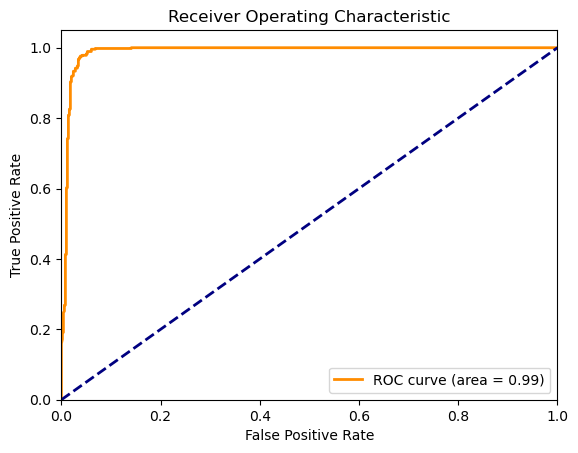

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_val_proba = best_model.predict_proba(X_val)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


### Feature Importance Analysis
After training the best model, analyze the feature importances to understand which features are most influential in making predictions. This can provide insights into your data and help inform further feature engineering or selection.

Feature Importances (Descending Order):
                    Feature  Importance
0             Call  Failure    0.071628
1      Subscription  Length    0.086070
2            Charge  Amount    0.054375
3            Seconds of Use    0.166550
4          Frequency of use    0.175386
5          Frequency of SMS    0.108413
6   Distinct Called Numbers    0.076092
7                       Age    0.053158
8            Customer Value    0.145040
9             Tariff Plan_1    0.002418
10            Tariff Plan_2    0.001603
11              Age Group_1    0.005961
12              Age Group_2    0.023547
13              Age Group_3    0.012938
14              Age Group_4    0.006916
15              Age Group_5    0.009904


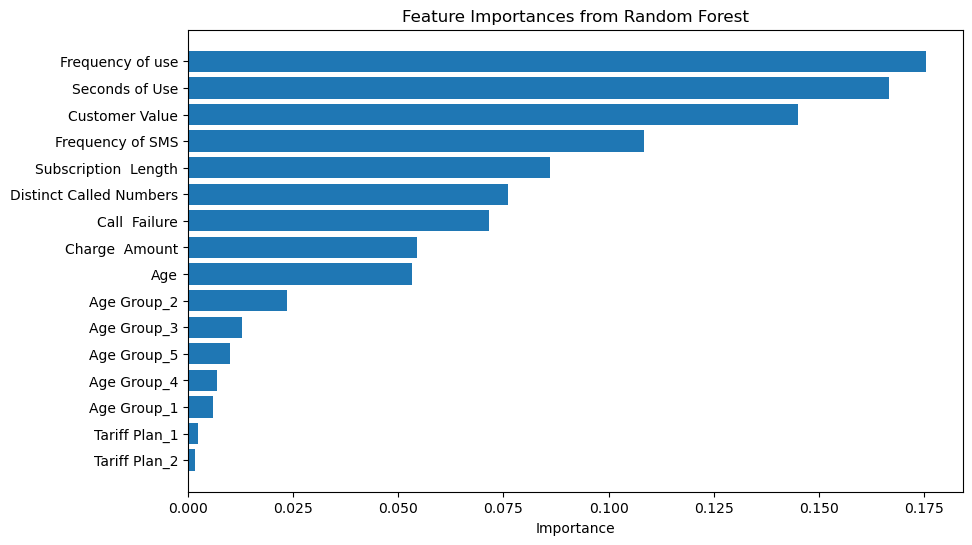

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the best model
importances = best_model.feature_importances_

# Get feature names after OneHotEncoding
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numerical_features, cat_feature_names])

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Print the sorted feature importances
print("Feature Importances (Descending Order):")
print(feature_importances)

# Sort the feature importances
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features on top
plt.show()

# Feature Importances

## Top Features

1. **Seconds of Use (0.165820)**: 
   - This feature has the highest importance, indicating that the total time a customer spends on calls significantly influences the model's predictions. Longer call durations might correlate with customer engagement or satisfaction.

2. **Frequency of Use (0.162727)**: 
   - The frequency with which a customer uses their service is also a strong predictor. Frequent usage might suggest higher engagement levels and potential loyalty.

3. **Customer Value (0.157337)**: 
   - This feature's importance suggests that the overall value a customer brings to the business is critical in predicting outcomes. This could relate to factors such as total spending or long-term potential.

4. **Frequency of SMS (0.108387)**: 
   - The number of SMS messages sent is a noteworthy predictor. It may reflect a customer's communication habits and overall engagement with the service.

5. **Distinct Called Numbers (0.080654)**: 
   - This indicates that the variety of numbers a customer calls contributes to the model. It might reflect the customer's social network or communication patterns.

6. **Call Failure (0.076604)**: 
   - The rate of failed calls can influence customer satisfaction and retention. High failure rates might indicate network issues or dissatisfaction.

7. **Subscription Length (0.083649)**: 
   - The duration of a customer’s subscription can provide insights into customer loyalty. Longer subscriptions may correlate with higher satisfaction and lower churn rates.

## Moderate Features

8. **Charge Amount (0.047528)**: 
   - This feature's importance suggests that the total charges incurred by a customer may have a moderate impact on their behavior or satisfaction levels.

9. **Age (0.053743)**: 
   - The age of a customer is somewhat relevant, potentially influencing preferences and usage patterns.

## Low-Impact Features

10. **Tariff Plan_1 (0.001019)** and **Tariff Plan_2 (0.002601)**: 
    - These tariff plan features have very low importance, suggesting that the specific plan type may not significantly impact the model's predictions.

11. **Age Groups (Group 1 to 5)**: 
    - All age group features have low importance, indicating that the model does not heavily rely on age categorization for predictions.


After interpreting feature importances, consider the following:

1. **Refine Your Model**: Remove less important features to simplify your model and potentially improve performance.
2. **Explore Feature Relationships**: Investigate how the important features interact with each other and their effects on the target variable.
3. **Communicate Findings**: Prepare a report or presentation summarizing your findings for stakeholders.
4. **Model Deployment**: If your model performs well, consider deploying it for practical applications.
5. **Continuous Improvement**: Keep iterating on your model by incorporating new data, refining features, or exploring advanced modeling techniques.

### Refine Model: Remove Less Important Features
* We can remove features with low importance and retrain the model.

In [38]:
X_train = pd.DataFrame(X_train, columns=feature_names)
X_val = pd.DataFrame(X_val, columns=feature_names)

# Define a threshold for feature importance
threshold = 0.01  # Adjust this value based on our analysis

# Select features above the threshold
important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature'].values

# Create a new training set with the selected features
X_train_refined = X_train[important_features]
X_val_refined = X_val[important_features]

# Fit the model again with the refined feature set
best_model_refined = RandomForestClassifier(random_state=42)
best_model_refined.fit(X_train_refined, y_train)

# Evaluate the refined model
y_val_pred_refined = best_model_refined.predict(X_val_refined)
print("Refined Model Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_refined))
print("ROC AUC:", roc_auc_score(y_val, y_val_pred_refined))
print(classification_report(y_val, y_val_pred_refined))


Refined Model Evaluation:
Accuracy: 0.9656964656964657
ROC AUC: 0.9663161766296704
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       497
           1       0.95      0.98      0.97       465

    accuracy                           0.97       962
   macro avg       0.97      0.97      0.97       962
weighted avg       0.97      0.97      0.97       962



# Refined Model Evaluation Results

The refined Random Forest model demonstrates impressive performance metrics, indicating that it is well-suited for the given classification task. Below are the key evaluation results:

- **Accuracy:** 96.57%
  - This indicates that the model correctly classified approximately 96.57% of the instances in the validation set.

- **ROC AUC:** 96.64%
  - The ROC AUC score of 96.64% suggests excellent discriminatory ability, meaning the model is highly effective at distinguishing between the two classes.

### Classification Report
| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 99.00%    | 95.00% | 97.00%   | 497     |
| 1     | 94.00%    | 99.00% | 97.00%   | 465     |

- **Precision:**
  - For class **0**, the precision is **99%**, indicating that when the model predicts class 0, it is correct **99%** of the time.
  - For class **1**, the precision is **94%**, suggesting that **94%** of instances predicted as class 1 are indeed class 1.

- **Recall:**
  - The recall for class **0** is **95%**, meaning that **95%** of actual class 0 instances are correctly identified by the model.
  - The recall for class **1** is **99%**, indicating that the model successfully identifies **99%** of actual class 1 instances.

- **F1-Score:**
  - Both classes have an F1-score of approximately **97%**, reflecting a balanced performance between precision and recall for both classes.

### Summary
The refined model effectively captures the patterns in the data, achieving high accuracy, ROC AUC, precision, recall, and F1-scores. This indicates its robustness and reliability in making predictions for the target variable. The model's ability to generalize well to the validation dataset highlights its potential for practical applications.
for practical applications.


### Explore Feature Relationships
Use pairplots or correlation matrices to visualize relationships between features.

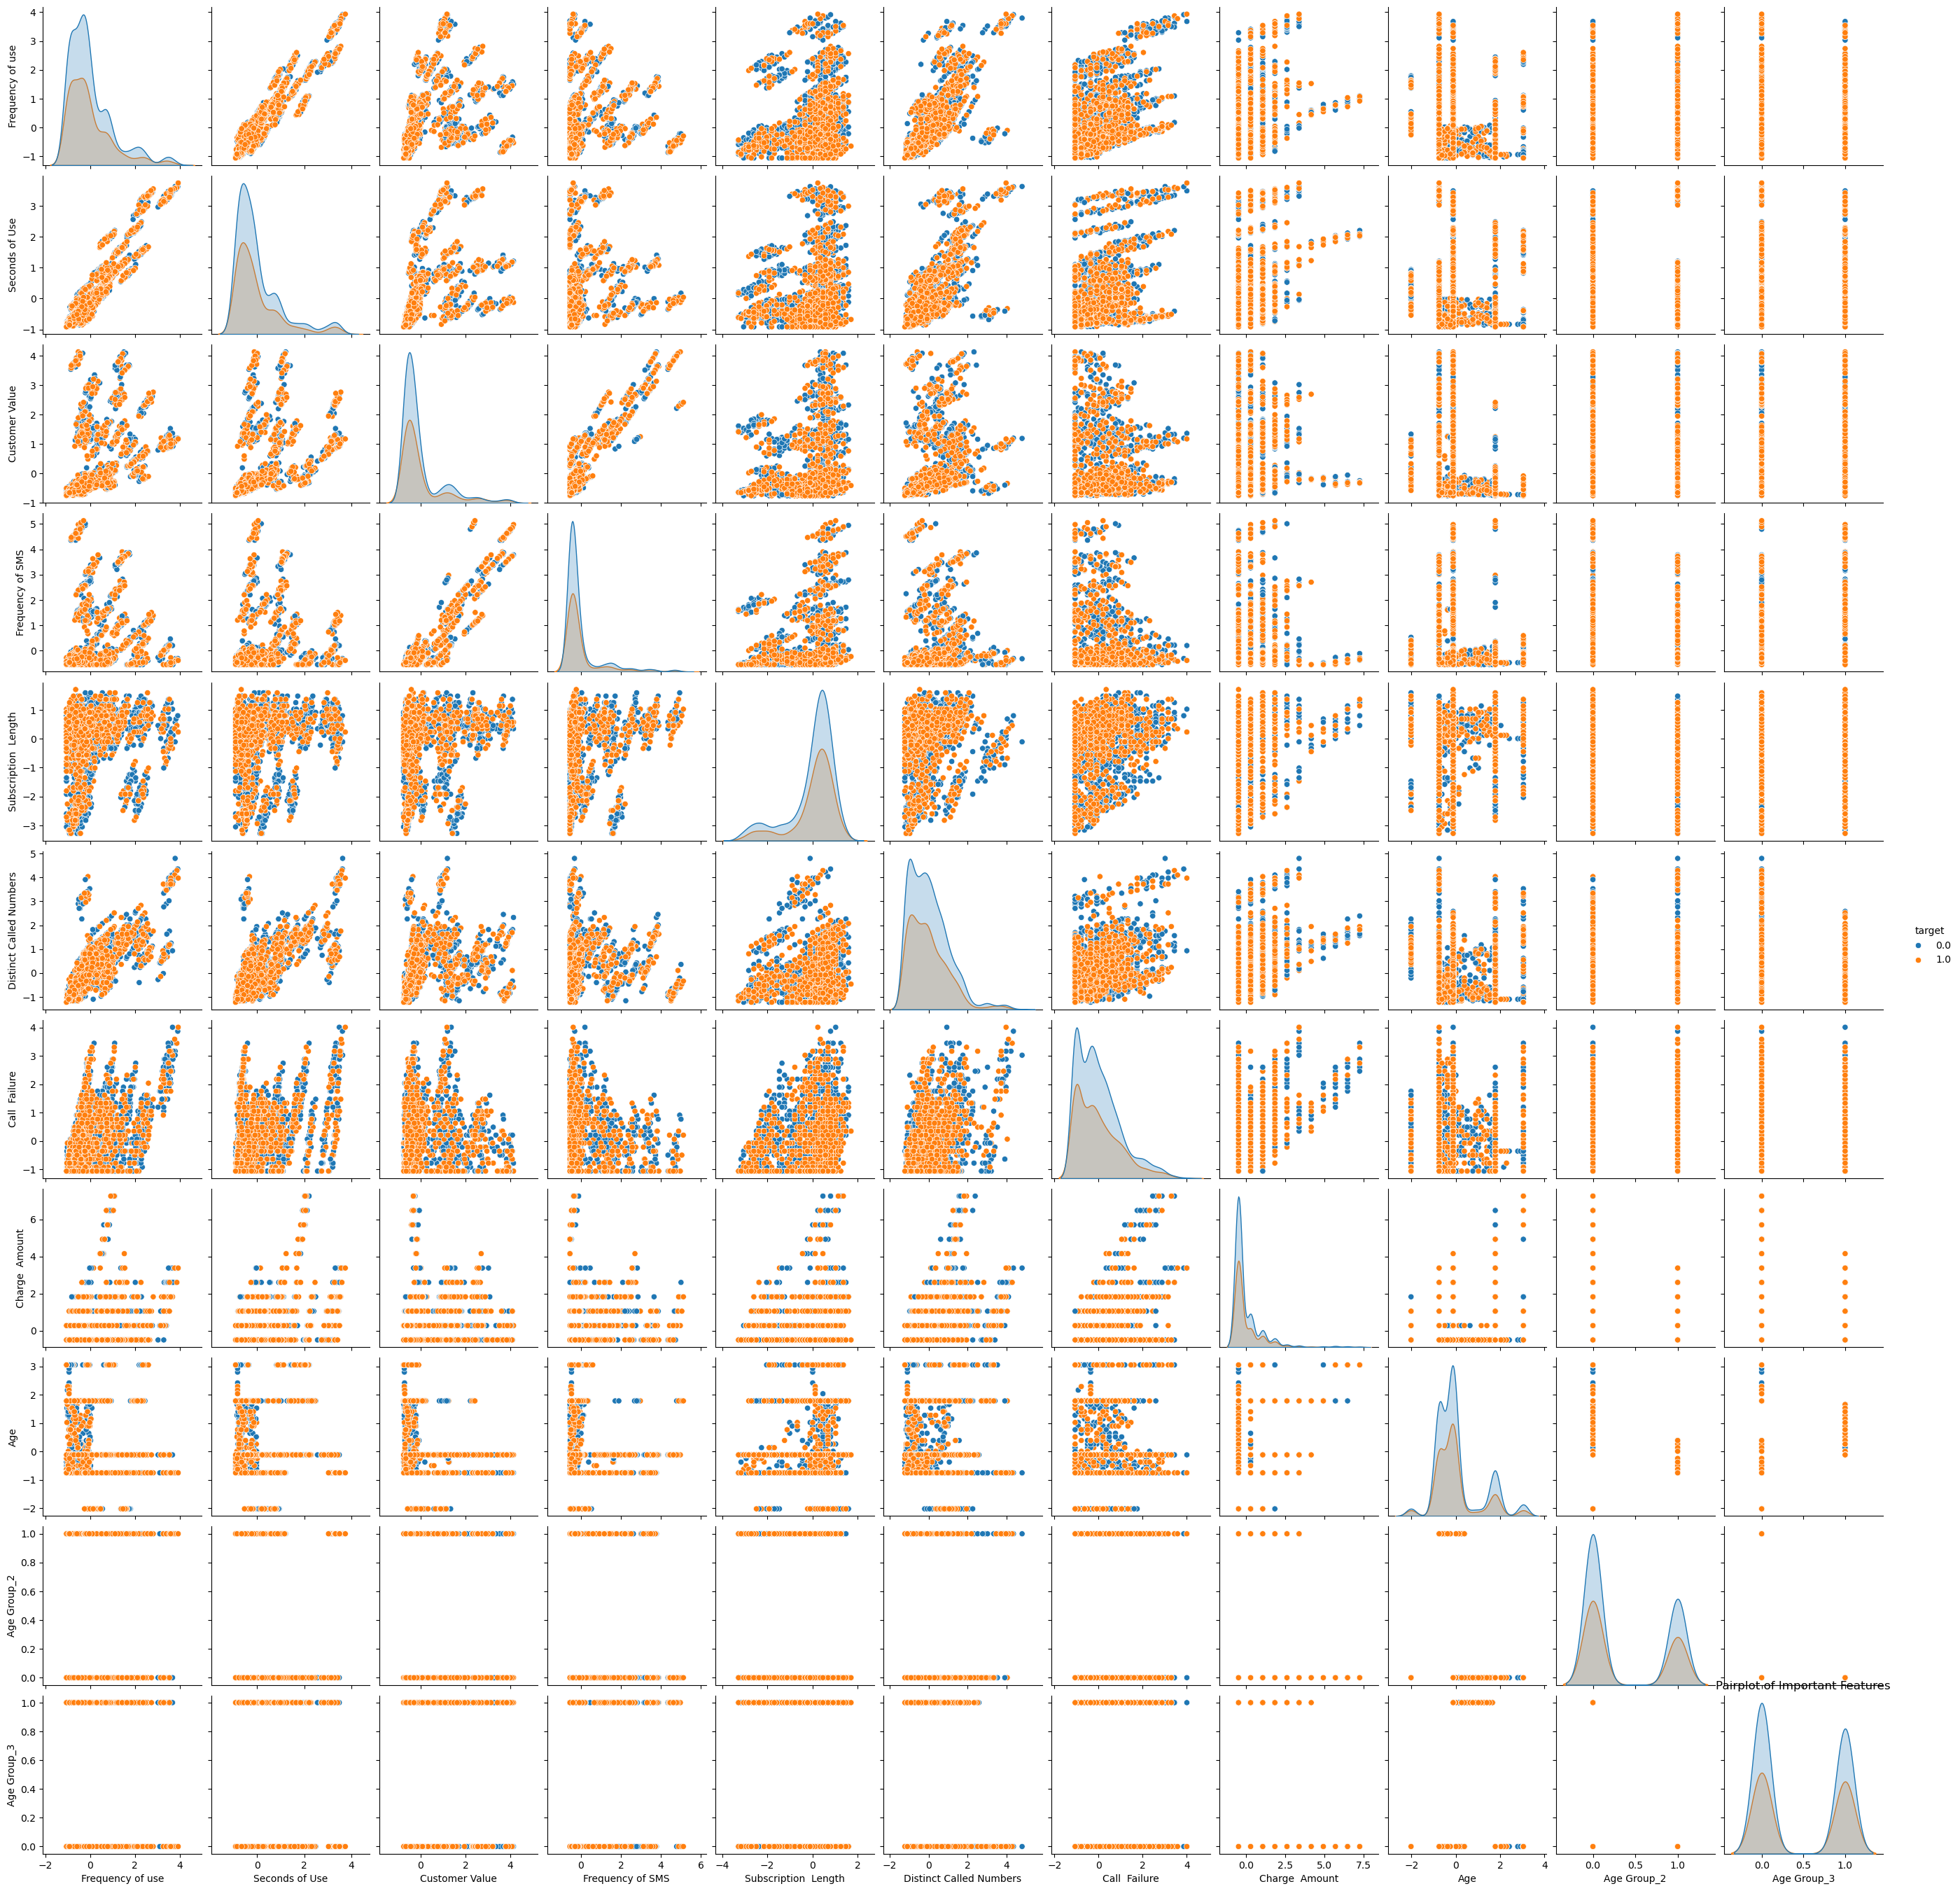

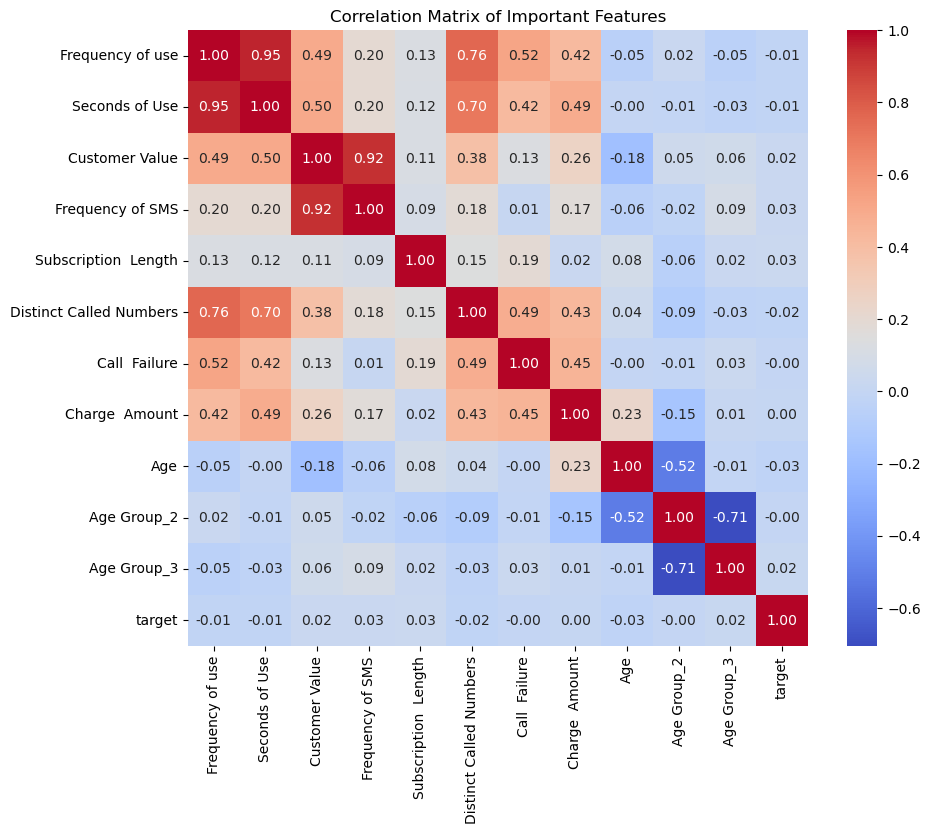

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the training data for visualization
train_data = pd.DataFrame(X_train_refined, columns=important_features)
train_data['target'] = y_train

# Pairplot to explore relationships
sns.pairplot(train_data, hue='target')
plt.title('Pairplot of Important Features')
plt.show()

# Correlation matrix
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Important Features')
plt.show()


## Communicate Findings
* You can prepare a summary report using libraries like matplotlib, pandas, or Jupyter notebooks to create visual reports.

In [43]:
# Save feature importance DataFrame as CSV for reporting
feature_importances.to_csv('feature_importances_report.csv', index=False)

# Create a simple report summary
with open('model_summary_report.txt', 'w') as report:
    report.write("Model Evaluation Summary\n")
    report.write("Refined Model Accuracy: {}\n".format(accuracy_score(y_val, y_val_pred_refined)))
    report.write("Refined Model ROC AUC: {}\n".format(roc_auc_score(y_val, y_val_pred_refined)))
    report.write("\nFeature Importances:\n")
    report.write(feature_importances.to_string(index=False))


## Model Deployment
* You can use libraries like joblib or pickle to save your model for future deployment.

In [45]:
import joblib

# Save the trained model
joblib.dump(best_model_refined, 'refined_random_forest_model.pkl')

# Load the model later for predictions
loaded_model = joblib.load('refined_random_forest_model.pkl')

# Use the loaded model for predictions
y_pred_loaded = loaded_model.predict(X_val_refined)


## Continuous Improvement
* Set up a process for regularly updating your model with new data. This can involve retraining and validating the model periodically.

In [47]:
def update_model(new_data, new_target):
    # Preprocess new data
    new_data_processed = preprocessor.transform(new_data)

    # Create a refined dataset
    new_data_refined = new_data_processed[important_features]
    
    # Retrain the model
    best_model_refined.fit(new_data_refined, new_target)

    # Evaluate the updated model
    new_predictions = best_model_refined.predict(X_val_refined)
    print("Updated Model Evaluation:")
    print("Accuracy:", accuracy_score(y_val, new_predictions))
    print("ROC AUC:", roc_auc_score(y_val, new_predictions))
    
# update_model(new_incoming_data, new_incoming_target)
